## 2021-1 영상정보처리 4주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 5점 
- 문제2: 5점

이름: 박민혁           
학번: 32151671

이미지를 컬러로 읽기
동일 크기의 그레이스케일 공 이미지 만들기
컬러 이미지의 각 픽셀의 RGB 값을 이용하여 grayscale 값으로 만들어서 그레이스케일 이미지의 동일자리에 배정하기 -> 그레이스케일 이미지 만들기
새로운 컬러 공 이미지를 만들고, 그레이스케일 이미지 값을 참조하여 화소값을 채운 후 출력하시오


In [37]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 3
%ls ../


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 3
 Dongkeun-OpenCV-ImgData/  'Report Week 3'/  'Report Week 5'/
'Report Week 2'/           'Report Week 4'/


Souce image 는 다음의 image_path 를 변경하지 말고 이용할 것. 경로가 다른 경우 감점 -3

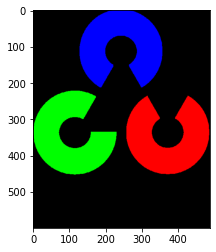

In [ ]:
import matplotlib.pyplot as pyplot
import cv2

image_path = '../Dongkeun-OpenCV-ImgData/logo.png'

image = cv2.imread(image_path)
pyplot.imshow(image)
pyplot.show()

## 문제 1: 부분 이미지를 이용한 이미지 생성

1. 위의 이미지 경로를 이용하여 이미지를 컬러 이미지 org_image 로 읽기
2. 읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기 
3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기 
  - x 축값이 4등분하여 4개의 영역이 동일 크기가 되지 않는 경우, 맨 오른쪽 영역에는 남는 크기 배분
  - subimage 1: 동일 영역에 해당하는 org_image 부분 복사하기 
  - subimage 2: 동일 영역에 해당하는 org_image 부분에서 Red 성분만 복사하고, green/blue 부분은 0으로 하여 subimage 2에 채워 넣을 것
  - subimage 3: 동일 영역에 해당하는 org_image 부분에서 Blue 성분만 복사하고, green/red 부분은 0으로 하여 subimage 3에 채워 넣을 것
  - subimage 4: 동일 영역에 해당하는 org_image 부분에서 Green 성분만 복사하고, blue/red 부분은 0으로 하여 subimage 4에 채워 넣을 것

4. new_image1 을 디스플레이하기 

org_image shape :  (600, 487, 3)
height : 600
width : 487


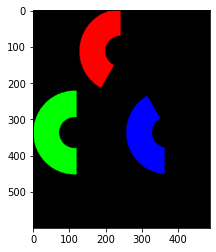

In [ ]:
import numpy as np

# org_image cv2로 읽기
org_image = cv2.imread(image_path)

# cv2는 색을 읽어 올 때 b, g, r 순서로 읽기 때문에 r, g, b 형태로 merge를 이용해 변환
b, g, r = cv2.split(org_image)
org_image = cv2.merge([r, g, b])

# 매트릭스 구조 확인
print('org_image shape : ', org_image.shape)
h, w, _ = org_image.shape
print('height : {0}'.format(h))
print('width : {0}'.format(w))

new_image1 = np.zeros((h, w, 3), np.uint8)

start, end = 0, int(w / 4) - 1
area = []

# 리스트에 x축을 기준으로 4등분 한 영역의 범위를 area에 삽입
for i in range(4):
    if i == 3:
        end = 487
        area.append((start, end))
        break

    area.append((start, end))
    start += int(w / 4)
    end += int(w / 4)

# 계층 성분 저장
layer = [_, 0, 2, 1]

# 0번 인덱스 부터 subimage1 - 4 (모든 성분, RED(0), BLUE(2), GREEEN(1))
for i in range(4):

    # subimage1
    if i == 0:
        for j in range(3):
            new_image1[:, area[i][0]: area[i][1], j] = org_image[:, area[i][0]: area[i][1], j]
        continue

    # subimage2 - 4
    for j in range(3):
        if j == layer[i]:
            new_image1[:, area[i][0]: area[i][1], j] = org_image[:, area[i][0]: area[i][1], j]
        else:
            new_image1[:, area[i][0]: area[i][1], j] = 0

pyplot.imshow(new_image1)
pyplot.show()

## 문제 2: 식을 이용한 grayscale 이미지 만들기 

1. org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
2. org_image 의 각 화소를 접근하여 강의에서 설명한 공식을 사용하여 grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
2. new_image2 디스플레이하기 

[참조] https://stackoverflow.com/questions/17615963/standard-rgb-to-grayscale-conversion



new_image2 shape :  (600, 487)


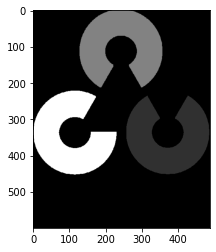

In [ ]:
import math

new_image2 = np.zeros((h, w), np.uint8)
print('new_image2 shape : ', new_image2.shape)

# 1번에서 이미 b, g, r 형태를 r, g, b 형태로 변환 하였으므로 생략

for i in range(h):
    for j in range(w):
        r, g, b = org_image[i, j, 0], org_image[i, j, 1], org_image[i, j, 2]
        gray = 0.299 * r + 0.587 * g + 0.114 * b
        # 각 화소마다 grayscale 값으로 변환
        new_image2[i, j] = gray

# cmap='gray'를 주지 않은 경우 grayscale 이미지를 제대로 읽지 못하는건 강의에 나와있음
# 따라서 cmap='gray' 옵션을 주어야 제대로 읽게 됨
pyplot.imshow(new_image2, cmap='gray')
pyplot.show()

